In [133]:
# importing libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [134]:
# reading the data file
data = pd.read_csv('dataset.csv')

In [135]:
# Splitting the dependent and Independent features after dropping the NaN columns
data = data.dropna(axis=1)
X = np.array(data.iloc[:,1:-1])
Y = np.array(data.iloc[:,-1])

In [136]:
# Encoding the categorical data using LabelEncoder
label_encoder = LabelEncoder()
for i in range(len(X[0])):
    if type(X[0][i])==str:
        X[:,i] = label_encoder.fit_transform(X[:,i])

In [137]:
# Splitting the test and train data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=122)

In [138]:
# Selecting the best 5 features
# using f-regression Algorithm
fs = SelectKBest(score_func=f_regression, k=6)
fs.fit(Xtrain, Ytrain)
Xtrain = fs.transform(Xtrain)
Xtest = fs.transform(Xtest)

# best five features or column names
column_names = list(data.columns[np.argsort(-fs.scores_)[:5] + 1])
column_names.append(data.columns[-1])

In [139]:
# The five best features and their scores
print([(i,j) for i,j in zip(column_names,fs.scores_[np.argsort(-fs.scores_)[:5]])])

[('OverallQual', 1962.8013397755442), ('GrLivArea', 1149.4274682392509), ('GarageCars', 863.262211588475), ('ExterQual', 782.49133397070841), ('GarageArea', 764.44564524106522)]


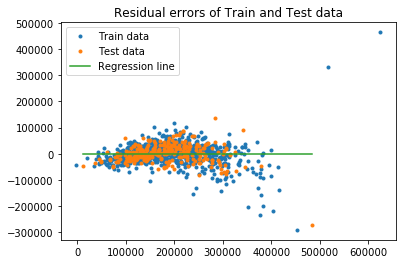

Root mean square error is :  35617.9385501927


In [140]:
# feature matrix for train data
X = np.column_stack([np.ones(len(Xtrain)),Xtrain])

# co-efficient vector
beta = (np.linalg.inv(X.T @ X) @ X.T) @ Ytrain

# Regression line
Ycalculated = X @ beta
plt.plot(Ycalculated,Ycalculated-Ytrain,'.')

# feature matrix for test data
X = np.column_stack([np.ones(len(Xtest)),Xtest])
Ycalculated = X @ beta

# plotting the residual errors
# residual errors -> deviaton from the regression line(predicted values)
plt.plot(Ycalculated,Ycalculated-Ytest,'.')
plt.plot([min(Ycalculated)-10,max(Ycalculated)+10],[0,0])
plt.legend(['Train data','Test data','Regression line'])
plt.title('Residual errors of Train and Test data')
plt.show()

# Root mean square error
RMSE = math.sqrt(sum([(i-j)**2 for i,j in zip(Ytest,Ycalculated)])/len(Ytest))
print('Root mean square error is : ',RMSE)

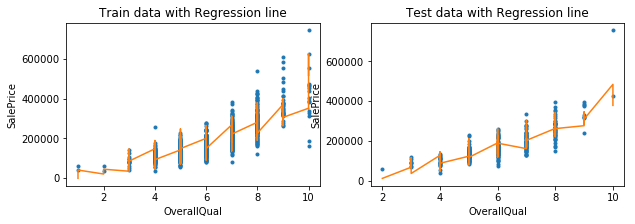

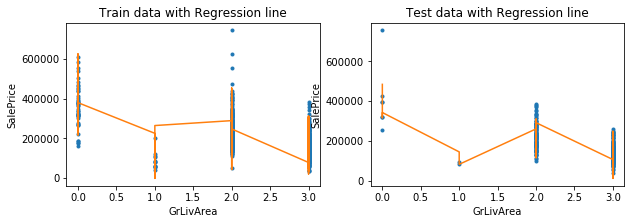

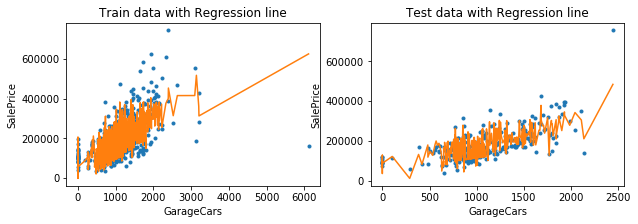

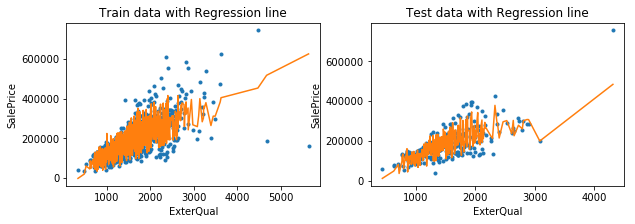

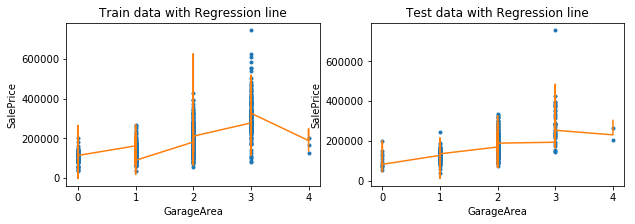

In [141]:
# Regression line
X = np.column_stack([np.ones(len(Xtrain)),Xtrain])
beta = (np.linalg.inv(X.T @ X) @ X.T) @ Ytrain
YcalculatedTrain = X @ beta

# calculating values using regression line
X = np.column_stack([np.ones(len(Xtest)),Xtest])
YcalculatedTest = X @ beta

# Since, multivariate regression line cannot be plotted for many column_names,
# plotting the regression line with respect to every feature with train and test data

for i in range(len(column_names)-1):

    # for plotting side-by-side
    f = plt.figure(figsize=(10,3))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    
    # sorting for clean regression line
    arr1inds = Xtrain[:,i].argsort()
    sorted_arr1 = Xtrain[:,i][arr1inds[::-1]]
    sorted_arr2 = YcalculatedTrain[arr1inds[::-1]]
    sorted_arr3 = Ytrain[arr1inds[::-1]]
    
    # plotting the Train data with regression line
    ax1.plot(sorted_arr1,sorted_arr3,'.')
    ax1.plot(sorted_arr1,sorted_arr2,'-')
    ax1.set_xlabel(column_names[i])
    ax1.set_ylabel(column_names[-1])
    ax1.set_title('Train data with Regression line')
    
    # sorting for clean regression line
    arr1inds = Xtest[:,i].argsort()
    sorted_arr1 = Xtest[:,i][arr1inds[::-1]]
    sorted_arr2 = YcalculatedTest[arr1inds[::-1]]
    sorted_arr3 = Ytest[arr1inds[::-1]]

    # plotting the Test data with regression line
    ax2.plot(sorted_arr1,sorted_arr3,'.')
    ax2.plot(sorted_arr1,sorted_arr2,'-')
    ax2.set_xlabel(column_names[i])
    ax2.set_ylabel(column_names[-1])
    ax2.set_title('Test data with Regression line')
    
    plt.show()